In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.shape

(800, 13)

In [4]:
# drop missing value-kolom type 2
df.drop('Type 2', axis=1, inplace=True)
df.shape

(800, 12)

In [5]:
# visualize label count in each category
for i in ['Type 1', 'Generation', 'Legendary']:
    print(i, ':')
    print(df[i].value_counts())
    print('-'*50)

Type 1 :
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
--------------------------------------------------
Generation :
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64
--------------------------------------------------
Legendary :
False    735
True      65
Name: Legendary, dtype: int64
--------------------------------------------------


## T-test 1 sample 2 tailed

apakah rata-rata Sp. atk pokemon tipe air lebih besar dari 70?

In [6]:
df.head(5)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [7]:
# water type pokemon descriptive statistic

# slicing dataframe to get water type pokemon only
water_type = df[df['Type 1']=='Water']

In [8]:
water_type.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
9,7,Squirtle,Water,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,630,79,103,120,135,115,78,1,False
59,54,Psyduck,Water,320,50,52,48,65,50,55,1,False


In [9]:
# descriptive statictics to see central tendency
water_type.describe().T

,count,mean,std,min,25%,50%,75%,max
#,112.0,303.089286,188.440807,7.0,130.00,275.0,456.25,693.0
Total,112.0,430.455357,113.188266,200.0,328.75,455.0,502.25,770.0
HP,112.0,72.062500,27.487026,20.0,52.25,70.0,90.25,170.0
Attack,112.0,74.151786,28.377192,10.0,53.00,72.0,92.00,155.0
Defense,112.0,72.946429,27.773809,20.0,54.50,70.0,88.50,180.0
Sp. Atk,112.0,74.812500,29.030128,10.0,55.00,70.0,90.50,180.0
Sp. Def,112.0,70.517857,28.460493,20.0,50.00,65.0,89.25,160.0
Speed,112.0,65.964286,23.019353,15.0,50.00,65.0,82.00,122.0
Generation,112.0,2.857143,1.558800,1.0,1.00,3.0,4.00,6.0


Water-Type Sp. Atk
- mean = 76.88
- std = 26.6

<AxesSubplot:ylabel='Sp. Atk'>

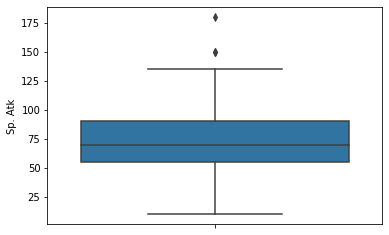

In [10]:
sns.boxplot(data=water_type, y='Sp. Atk')

1. Apakah rata-rata `Sp. Atk` dari pokemon bertipe water berbeda signifikan dari 70?

Pokemon bertipe 1 water memiliki rata-rata SP. Atk sebesar 76.88, berdasarkan data tersebut dapat dibuat hipotesis berupa:

- H0 = Rata-rata Sp. Atk tipe Water = 70
- H1 = Rata-rata Sp. Atk tipe Water != 70

In [11]:
# ttest 1 sample 2 tailed
t_stat,p_val = stats.ttest_1samp(water_type['Sp. Atk'], 70)

print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.0821200905266741
t-statistics: 1.7544088461853662


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


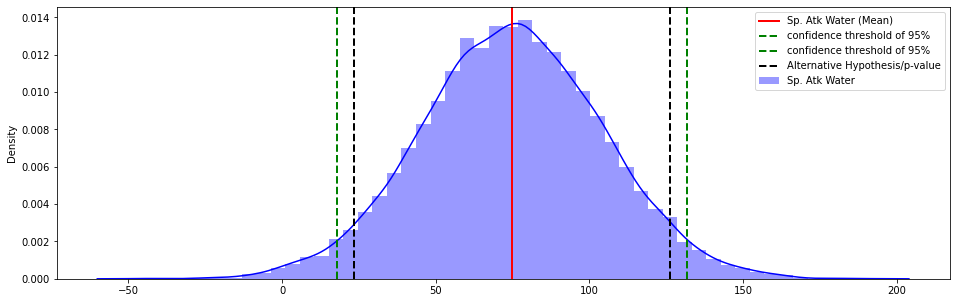

In [12]:
#simulasi
pop = np.random.normal(water_type['Sp. Atk'].mean(), water_type['Sp. Atk'].std(), 10000)

# confidence interval with critical value 0.05
ci = stats.norm.interval(0.95, water_type['Sp. Atk'].mean(), water_type['Sp. Atk'].std())

plt.figure(figsize=(16,5))
# memvisualisasikan simulasi pdf
sns.distplot(pop, label='Sp. Atk Water', color='blue')
plt.axvline(water_type['Sp. Atk'].mean(), color='red', linewidth=2, label='Sp. Atk Water (Mean)')

# membuat garis confidence interval
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# membuat garis p-value/alternative hypotesis
plt.axvline(pop.mean() + t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis/p-value')
plt.axvline(pop.mean() - t_stat*pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## T-test 2 sample 1 Tailed and 2 Tailed

Is Pokemon Gen 4 stronger (Attack) than Pokemon Gen 1?

In [13]:
# Slicing Pokemon Gen 1 df
Gen_1 = df[df['Generation']==1]

# descriptive statistics to see central tendency of gen 1
Gen_1.describe().T

,count,mean,std,min,25%,50%,75%,max
#,166.0,75.819277,45.153246,1.0,36.25,76.5,115.00,151.0
Total,166.0,426.813253,115.878076,195.0,325.00,436.5,500.00,780.0
HP,166.0,65.819277,28.153968,10.0,46.50,62.0,80.00,250.0
Attack,166.0,76.638554,30.744727,5.0,55.00,75.0,95.00,190.0
Defense,166.0,70.861446,28.641336,5.0,50.00,66.0,85.00,180.0
Sp. Atk,166.0,71.819277,34.439106,15.0,45.00,65.0,95.00,194.0
Sp. Def,166.0,69.090361,25.505275,20.0,50.00,70.0,85.00,130.0
Speed,166.0,72.584337,29.675857,15.0,50.00,70.0,92.25,150.0
Generation,166.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0


In [14]:
# Slicing Pokemon Gen 4 df
Gen_4 = df[df['Generation']==4]

# descriptive statistics to see central tendency of gen 4
Gen_4.describe().T

,count,mean,std,min,25%,50%,75%,max
#,121.0,442.446281,31.250053,387.0,415.0,444.0,471.0,493.0
Total,121.0,459.016529,119.556541,194.0,350.0,485.0,530.0,720.0
HP,121.0,73.082645,25.113604,20.0,55.0,70.0,85.0,150.0
Attack,121.0,82.867769,32.780569,5.0,62.0,80.0,103.0,170.0
Defense,121.0,78.132231,30.145741,5.0,51.0,72.0,105.0,168.0
Sp. Atk,121.0,76.404959,31.907047,10.0,54.0,71.0,100.0,150.0
Sp. Def,121.0,77.190083,27.498883,30.0,55.0,75.0,100.0,150.0
Speed,121.0,71.338843,28.475005,5.0,46.0,77.0,91.0,135.0
Generation,121.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


Attack Gen 1:
- mean = 81.205128
- std = 32.220168

Attack Gen 4:
- mean = 85.134328
- std = 33.619031

## Hypothesis testing T-Test 2 Sample 1 Tailed

- H0 = Mean of Attack from Gen 4 <= Mean of Attack From Gen 1
- H1 = Mean of Attack from Gen 4 > Mean of Attack From Gen 1

In [15]:
# t-test 2 sample 1 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Attack'], Gen_1['Attack']) # default H1 = n0 > n1

# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.050208316734338045
t-statistics: 1.6481850363938986


In [16]:
t_stat

1.6481850363938986

28.94853081910076


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


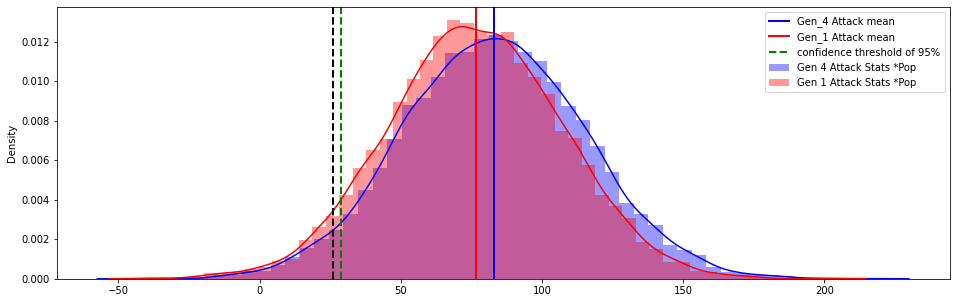

In [17]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Attack'].mean(),Gen_4['Attack'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Attack'].mean(),Gen_1['Attack'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 1 tailed, confidence interval 0.90 
ci = stats.norm.interval(0.90, Gen_4['Attack'].mean(), Gen_4['Attack'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Attack Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Attack Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Attack'].mean(), color='blue', linewidth=2, label='Gen_4 Attack mean')
plt.axvline(Gen_1['Attack'].mean(), color='red',  linewidth=2, label='Gen_1 Attack mean')

# plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

# plt.axvline(gen_1_pop.mean()+t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(gen_1_pop.mean()-t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Hypothesis Testing T-Test 2 Sample 2 Tailed

- H0 = Mean of Attack from Gen 4 = Mean of Attack From Gen 1
- H1 = Mean of Attack from Gen 4 != Mean of Attack From Gen 1

In [18]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(Gen_4['Attack'], Gen_1['Attack'])

# ttest_ind is 2-tailed, we dont need to divide by 2
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.10041663346867609
t-statistics: 1.6481850363938986


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


18.619034006688267


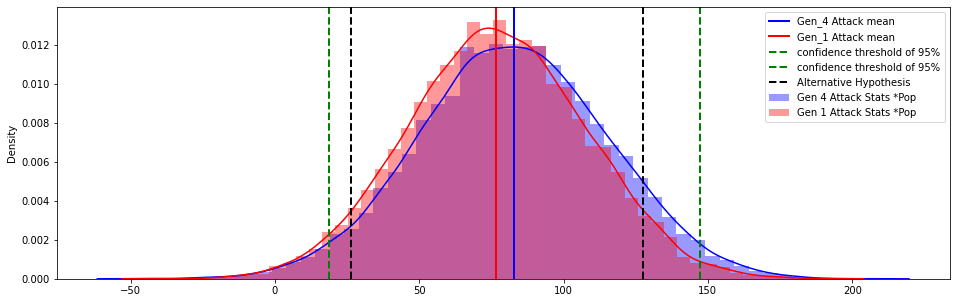

In [19]:
# simulation
gen_4_pop = np.random.normal(Gen_4['Attack'].mean(),Gen_4['Attack'].std(),10000)
gen_1_pop = np.random.normal(Gen_1['Attack'].mean(),Gen_1['Attack'].std(),10000)

# confidence interval based on gen 4
# used cv = 0.05 since 2 tailed, we use 0.95 as it is. 
ci = stats.norm.interval(0.95, Gen_4['Attack'].mean(), Gen_4['Attack'].std())

plt.figure(figsize=(16,5))
sns.distplot(gen_4_pop, label='Gen 4 Attack Stats *Pop',color='blue')
sns.distplot(gen_1_pop, label='Gen 1 Attack Stats *Pop',color='red')

# mean
plt.axvline(Gen_4['Attack'].mean(), color='blue', linewidth=2, label='Gen_4 Attack mean')
plt.axvline(Gen_1['Attack'].mean(), color='red',  linewidth=2, label='Gen_1 Attack mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(gen_1_pop.mean()+t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(gen_1_pop.mean()-t_stat*gen_1_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
print(ci[0])

## Anova

Compare Overall stats (`Total`) from pokemon Gen 1, Gen 2, and Gen 3.

In [20]:
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [21]:
df.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

In [22]:
Total_gen_1 = df[df['Generation']==1]['Total']
Total_gen_1.mean()

426.81325301204816

In [23]:
Total_gen_2 = df[df['Generation']==2]['Total']
Total_gen_2.mean()

418.2830188679245

In [24]:
Total_gen_3 = df[df['Generation']==3]['Total']
Total_gen_3.mean()

436.225

In [25]:
f_stat,p_value = stats.f_oneway(Total_gen_1, Total_gen_2, Total_gen_3)
print('P-value:',p_value)

P-value: 0.5095075633438346
